Only doing 2008 to get a sense of the most important columns within all of the datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import RFE, VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LassoCV, Ridge
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [2]:
data_2008 = pd.read_csv("C:/Users/sambi/Documents/LMU-Datathon-2024/EPA Contract Data/FY2008_068_Contracts_Full_20240213_1.csv", low_memory=False)
data_2009 = pd.read_csv("C:/Users/sambi/Documents/LMU-Datathon-2024/EPA Contract Data/FY2009_068_Contracts_Full_20240213_1.csv", low_memory=False)
data_2010 = pd.read_csv("C:/Users/sambi/Documents/LMU-Datathon-2024/EPA Contract Data/FY2010_068_Contracts_Full_20240213_1.csv", low_memory=False)
data_2011 = pd.read_csv("C:/Users/sambi/Documents/LMU-Datathon-2024/EPA Contract Data/FY2011_068_Contracts_Full_20240213_1.csv", low_memory=False)
data_2012 = pd.read_csv("C:/Users/sambi/Documents/LMU-Datathon-2024/EPA Contract Data/FY2012_068_Contracts_Full_20240213_1.csv", low_memory=False)
data_2013 = pd.read_csv("C:/Users/sambi/Documents/LMU-Datathon-2024/EPA Contract Data/FY2013_068_Contracts_Full_20240213_1.csv", low_memory=False)
data_2014 = pd.read_csv("C:/Users/sambi/Documents/LMU-Datathon-2024/EPA Contract Data/FY2014_068_Contracts_Full_20240213_1.csv", low_memory=False)
data_2015 = pd.read_csv("C:/Users/sambi/Documents/LMU-Datathon-2024/EPA Contract Data/FY2015_068_Contracts_Full_20240213_1.csv", low_memory=False)
data_2016 = pd.read_csv("C:/Users/sambi/Documents/LMU-Datathon-2024/EPA Contract Data/FY2016_068_Contracts_Full_20240213_1.csv", low_memory=False)
data_2017 = pd.read_csv("C:/Users/sambi/Documents/LMU-Datathon-2024/EPA Contract Data/FY2017_068_Contracts_Full_20240213_1.csv", low_memory=False)
data_2018 = pd.read_csv("C:/Users/sambi/Documents/LMU-Datathon-2024/EPA Contract Data/FY2018_068_Contracts_Full_20240214_1.csv", low_memory=False)
data_2019 = pd.read_csv("C:/Users/sambi/Documents/LMU-Datathon-2024/EPA Contract Data/FY2019_068_Contracts_Full_20240214_1.csv", low_memory=False)
data_2020 = pd.read_csv("C:/Users/sambi/Documents/LMU-Datathon-2024/EPA Contract Data/FY2020_068_Contracts_Full_20240214_1.csv", low_memory=False)
data_2021 = pd.read_csv("C:/Users/sambi/Documents/LMU-Datathon-2024/EPA Contract Data/FY2021_068_Contracts_Full_20240214_1.csv", low_memory=False)
data_2022 = pd.read_csv("C:/Users/sambi/Documents/LMU-Datathon-2024/EPA Contract Data/FY2022_068_Contracts_Full_20240214_1.csv", low_memory=False)
data_2023 = pd.read_csv("C:/Users/sambi/Documents/LMU-Datathon-2024/EPA Contract Data/FY2023_068_Contracts_Full_20240214_1.csv", low_memory=False)
data_2024 = pd.read_csv("C:/Users/sambi/Documents/LMU-Datathon-2024/EPA Contract Data/FY2024_068_Contracts_Full_20240214_1.csv", low_memory=False)

In [3]:
data_2008.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23120 entries, 0 to 23119
Columns: 297 entries, contract_transaction_unique_key to last_modified_date
dtypes: float64(41), int64(3), object(253)
memory usage: 52.4+ MB


In [4]:


awarded_companies = pd.DataFrame()
dataframes = [data_2008, data_2009, data_2010, data_2011, data_2012, data_2013, data_2014, data_2015, 
              data_2016, data_2017, data_2018, data_2019, data_2020, data_2021, data_2022, data_2023, data_2024]
filter_dataframes = [data[data['potential_total_value_of_award'].notna() & (data['potential_total_value_of_award'] > 0)] for data in dataframes]
awarded_companies = pd.concat(filter_dataframes, ignore_index=True)
awarded_companies.shape



(98689, 297)

In [48]:
# awarded_companies.drop(columns=['action_date_fiscal_year', 'solicitation_dates', 'awarding_agency_code', 'awarding_agency_name', 
#                                 'awarding_sub_agency_code', 'awarding_sub_agency_name', 'funding_agency_name', 'funding_sub_agency_code', 
#                                 'funding_sub_agency_name', 'treasury_accounts_funding_this_award', 'federal_accounts_funding_this_award',
#                                'object_classes_funding_this_award', 'foreign_funding', 'foreign_funding_description', 'sam_exception_description',
#                                'sam_exception', 'recipient_country_code', 'recipient_country_name', 'recipient_address_line_2', 'recipient_state_name',
#                                'prime_award_transaction_recipient_cd_original', 'prime_award_transaction_place_of_performance_county_fips_code',
#                                'prime_award_transaction_place_of_performance_state_fips_code', 'primary_place_of_performance_state_name', ], axis=1, inplace=True)

In [5]:
awarded_companies.dropna(axis=1, how='all', inplace=True)
# awarded_companies.shape

awarded_companies['recipient_city_name'].nunique()

1424

In [7]:
award_city = awarded_companies.groupby('recipient_city_name')['potential_total_value_of_award'].sum()

In [8]:
print(sns.palettes.SEABORN_PALETTES)

{'deep': ['#4C72B0', '#DD8452', '#55A868', '#C44E52', '#8172B3', '#937860', '#DA8BC3', '#8C8C8C', '#CCB974', '#64B5CD'], 'deep6': ['#4C72B0', '#55A868', '#C44E52', '#8172B3', '#CCB974', '#64B5CD'], 'muted': ['#4878D0', '#EE854A', '#6ACC64', '#D65F5F', '#956CB4', '#8C613C', '#DC7EC0', '#797979', '#D5BB67', '#82C6E2'], 'muted6': ['#4878D0', '#6ACC64', '#D65F5F', '#956CB4', '#D5BB67', '#82C6E2'], 'pastel': ['#A1C9F4', '#FFB482', '#8DE5A1', '#FF9F9B', '#D0BBFF', '#DEBB9B', '#FAB0E4', '#CFCFCF', '#FFFEA3', '#B9F2F0'], 'pastel6': ['#A1C9F4', '#8DE5A1', '#FF9F9B', '#D0BBFF', '#FFFEA3', '#B9F2F0'], 'bright': ['#023EFF', '#FF7C00', '#1AC938', '#E8000B', '#8B2BE2', '#9F4800', '#F14CC1', '#A3A3A3', '#FFC400', '#00D7FF'], 'bright6': ['#023EFF', '#1AC938', '#E8000B', '#8B2BE2', '#FFC400', '#00D7FF'], 'dark': ['#001C7F', '#B1400D', '#12711C', '#8C0800', '#591E71', '#592F0D', '#A23582', '#3C3C3C', '#B8850A', '#006374'], 'dark6': ['#001C7F', '#12711C', '#8C0800', '#591E71', '#B8850A', '#006374'], 'col

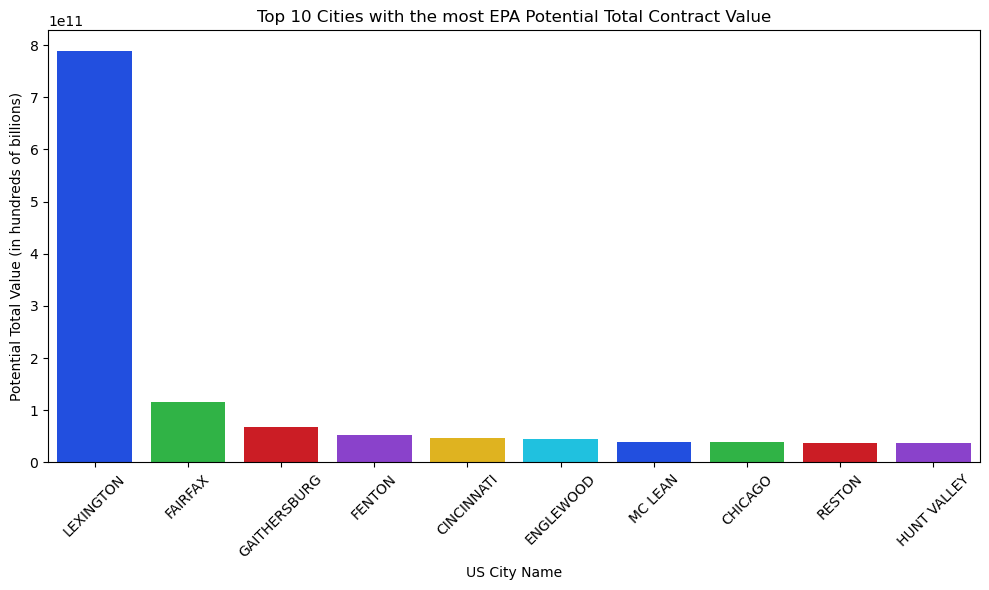

In [61]:
sorted_cities = award_city.sort_values(ascending=False).head(10)
data = sorted_cities.reset_index()
data.columns = ['US City Name', 'Potential Total Value of Award (in hundred of billions)']

plt.figure(figsize=(10, 6))
sns.barplot(x='US City Name', y='Potential Total Value of Award (in hundred of billions)', data=data, palette='bright6')

plt.xticks(rotation=45)
plt.xlabel(xlabel="US City Name")
plt.ylabel(ylabel="Potential Total Value (in hundreds of billions)")
plt.title("Top 10 Cities with the most EPA Potential Total Contract Value")

plt.tight_layout()
plt.show()

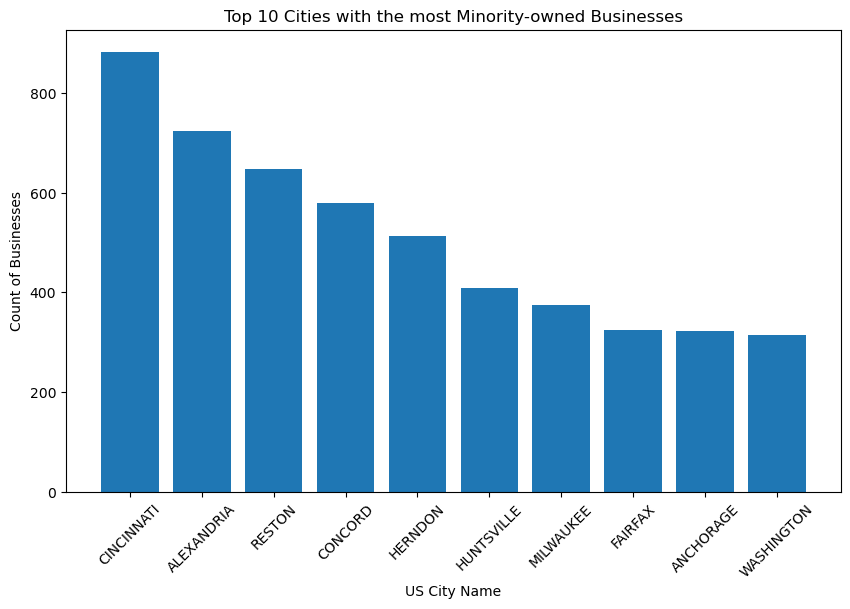

In [52]:
minority_owned_companies = awarded_companies[awarded_companies['minority_owned_business'] == 't']
minority_awarded_cities = minority_owned_companies.groupby('recipient_city_name').size()

plt.figure(figsize=(10, 6))
sorted_cities = minority_awarded_cities.sort_values(ascending=False).head(10)
plt.bar(sorted_cities.index, sorted_cities.values)
plt.xticks(range(len(sorted_cities)), rotation=45)
plt.xlabel(xlabel="US City Name")
plt.ylabel(ylabel="Count of Businesses")
plt.title("Top 10 Cities with the most Minority-owned Businesses")
plt.show()

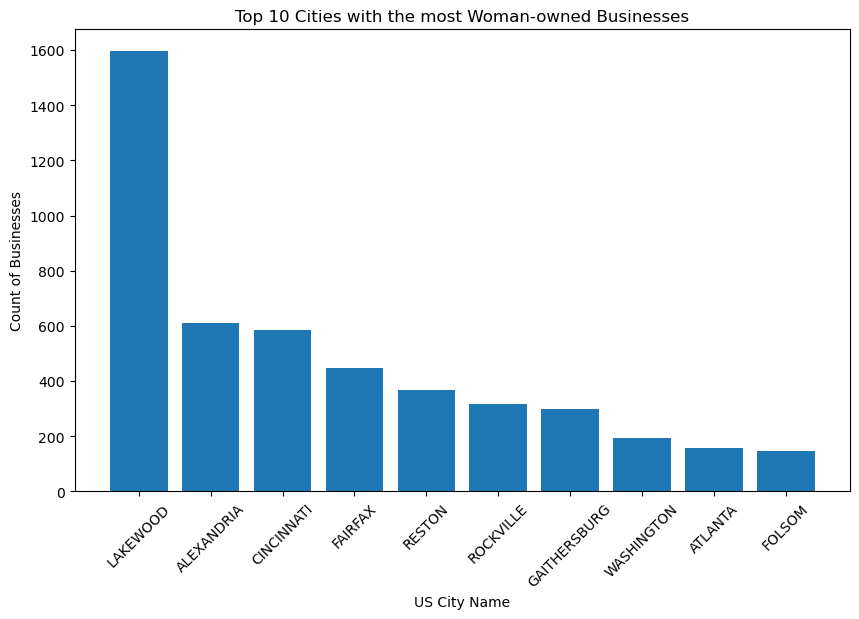

In [53]:
woman_owned_companies = awarded_companies[awarded_companies['woman_owned_business'] == 't']
woman_business_cities = woman_owned_companies.groupby('recipient_city_name').size()

plt.figure(figsize=(10, 6))
sorted_cities = woman_business_cities.sort_values(ascending=False).head(10)
plt.bar(sorted_cities.index, sorted_cities.values)
plt.xticks(range(len(sorted_cities)), rotation=45)
plt.xlabel(xlabel="US City Name")
plt.ylabel(ylabel="Count of Businesses")
plt.title("Top 10 Cities with the most Woman-owned Businesses")
plt.show()

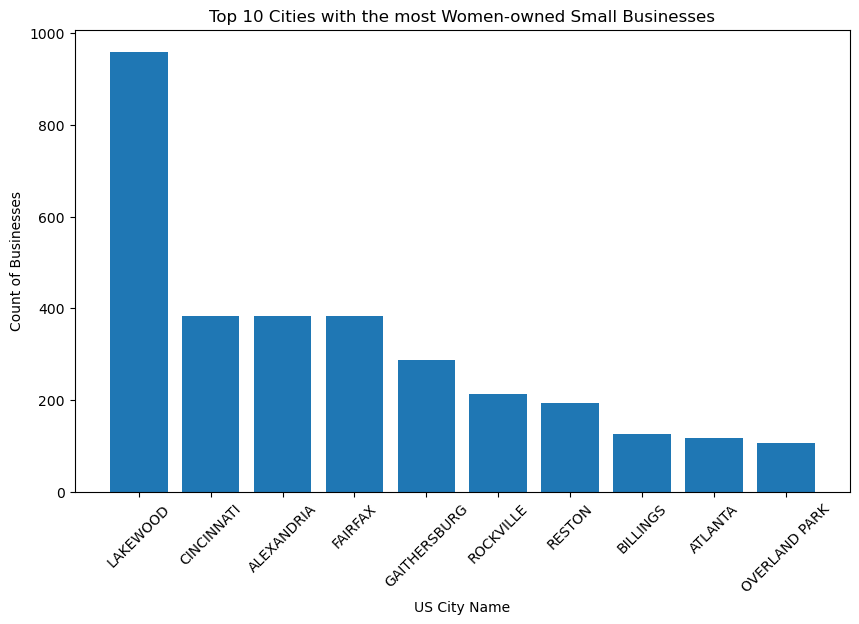

In [54]:
woman_owned_small_biz = awarded_companies[awarded_companies['women_owned_small_business'] == 't']
woman_small_biz_cities = woman_owned_small_biz.groupby('recipient_city_name').size()

plt.figure(figsize=(10, 6))
sorted_cities = woman_small_biz_cities.sort_values(ascending=False).head(10)
plt.bar(sorted_cities.index, sorted_cities.values)
plt.xticks(range(len(sorted_cities)), rotation=45)
plt.xlabel(xlabel="US City Name")
plt.ylabel(ylabel="Count of Businesses")
plt.title("Top 10 Cities with the most Women-owned Small Businesses")
plt.show()

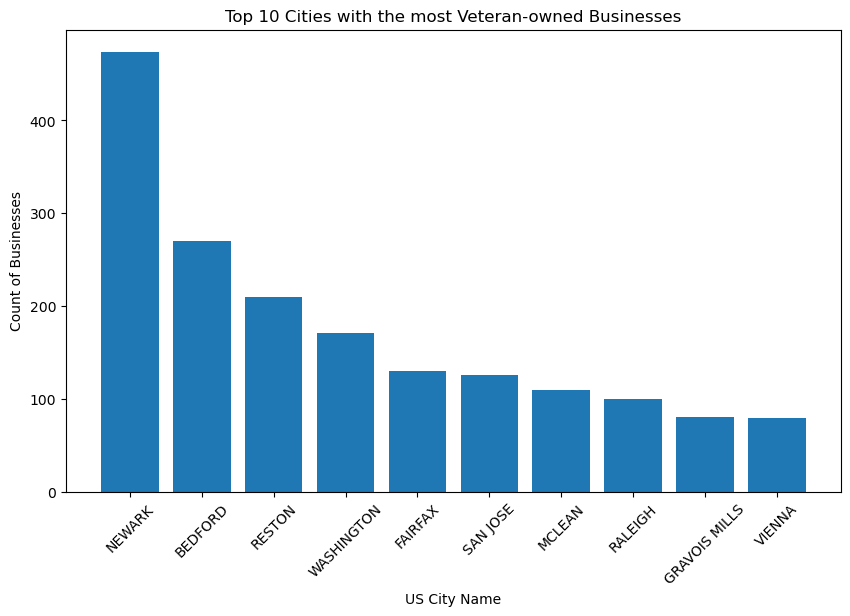

In [55]:
veteran_owned_companies = awarded_companies[awarded_companies['veteran_owned_business'] == 't']
veteran_cities = veteran_owned_companies.groupby('recipient_city_name').size()

plt.figure(figsize=(10, 6))
sorted_cities = veteran_cities.sort_values(ascending=False).head(10)
plt.bar(sorted_cities.index, sorted_cities.values)
plt.xticks(range(len(sorted_cities)), rotation=45)
plt.xlabel(xlabel="US City Name")
plt.ylabel(ylabel="Count of Businesses")
plt.title("Top 10 Cities with the most Veteran-owned Businesses")
plt.show()

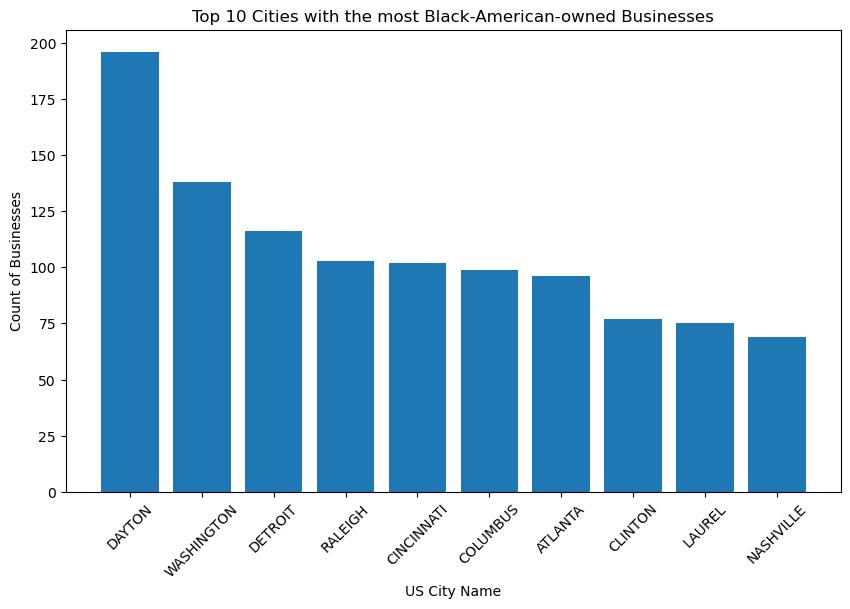

In [56]:
black_owned_companies = awarded_companies[awarded_companies['black_american_owned_business'] == 't']
black_firm_cities = black_owned_companies.groupby('recipient_city_name').size()

plt.figure(figsize=(10, 6))
sorted_cities = black_firm_cities.sort_values(ascending=False).head(10)
plt.bar(sorted_cities.index, sorted_cities.values)
plt.xticks(range(len(sorted_cities)), rotation=45)
plt.xlabel(xlabel="US City Name")
plt.ylabel(ylabel="Count of Businesses")
plt.title("Top 10 Cities with the most Black-American-owned Businesses")
plt.show()

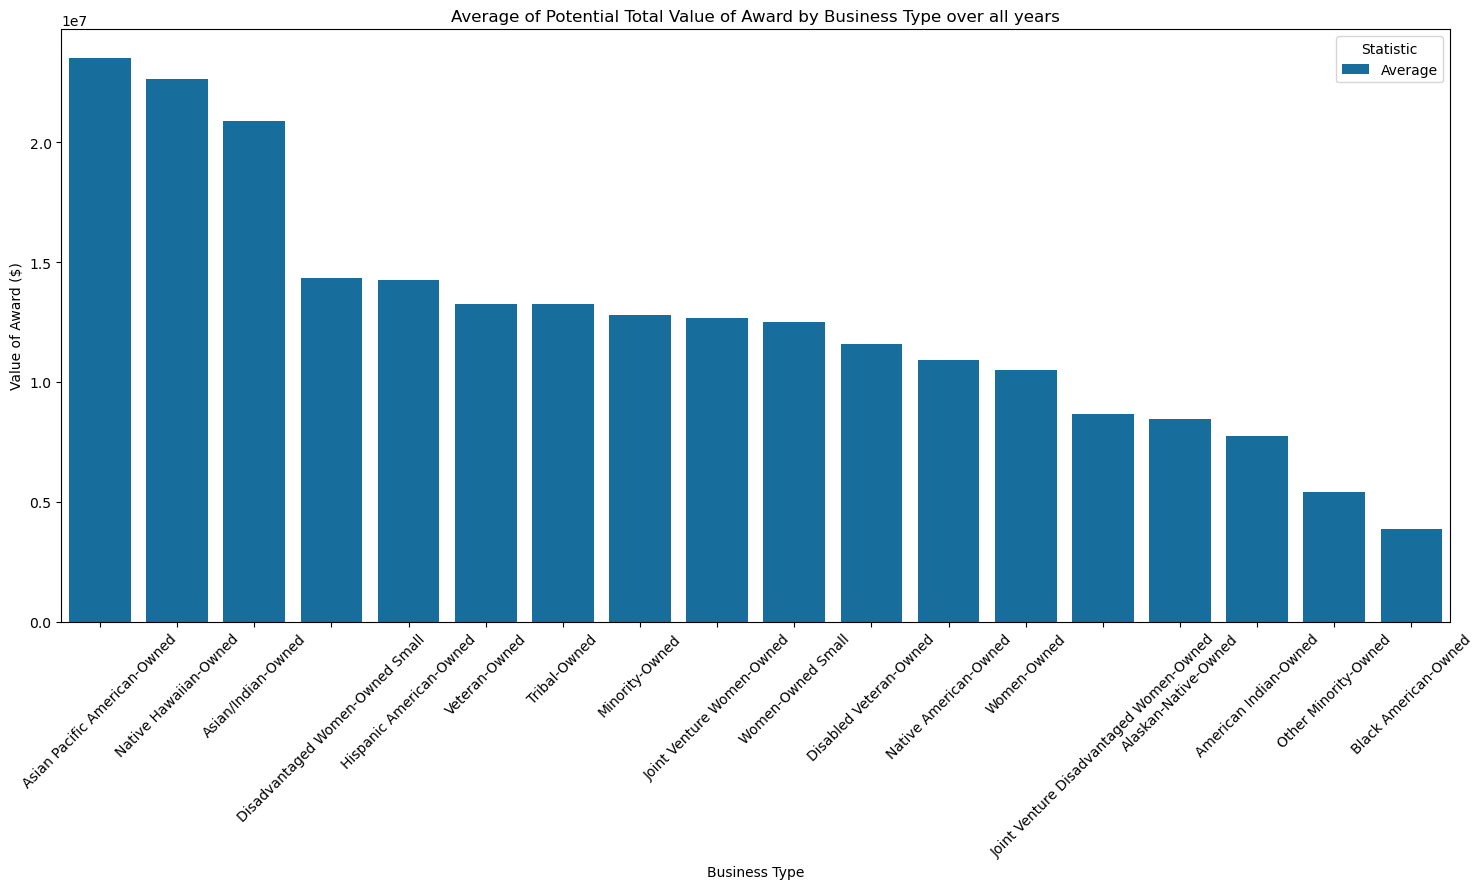

In [82]:
women_owned = awarded_companies[awarded_companies['woman_owned_business'] == 't']
women_stats = women_owned['potential_total_value_of_award'].agg(['sum', 'mean'])

minority_owned = awarded_companies[awarded_companies['minority_owned_business'] == 't']
minority_stats = minority_owned['potential_total_value_of_award'].agg(['sum', 'mean'])

veteran_owned = awarded_companies[awarded_companies['veteran_owned_business'] == 't']
veteran_stats = veteran_owned['potential_total_value_of_award'].agg(['sum', 'mean'])

alaskan_native_owned = awarded_companies[awarded_companies['alaskan_native_corporation_owned_firm'] == 't']
alaskan_stats = alaskan_native_owned['potential_total_value_of_award'].agg(['sum', 'mean'])

american_indian_owned = awarded_companies[awarded_companies['american_indian_owned_business'] == 't']
american_indian_stats = american_indian_owned['potential_total_value_of_award'].agg(['sum', 'mean'])

native_hawaiian = awarded_companies[awarded_companies['native_hawaiian_organization_owned_firm'] == 't']
native_hawaiian_stats = native_hawaiian['potential_total_value_of_award'].agg(['sum', 'mean'])

tribal_owned = awarded_companies[awarded_companies['veteran_owned_business'] == 't']
tribal_stats = tribal_owned['potential_total_value_of_award'].agg(['sum', 'mean'])

veteran_disabled_owned = awarded_companies[awarded_companies['service_disabled_veteran_owned_business'] == 't']
veteran_disabled_stats = veteran_disabled_owned['potential_total_value_of_award'].agg(['sum', 'mean'])

women_owned_small = awarded_companies[awarded_companies['women_owned_small_business'] == 't']
women_owned_small_stats = women_owned_small['potential_total_value_of_award'].agg(['sum', 'mean'])

disadvantaged_women_small = awarded_companies[awarded_companies['economically_disadvantaged_women_owned_small_business'] == 't']
disadvantaged_women_stats = disadvantaged_women_small['potential_total_value_of_award'].agg(['sum', 'mean'])

jv_women_small = awarded_companies[awarded_companies['joint_venture_women_owned_small_business'] == 't']
jv_women_small_stats = jv_women_small['potential_total_value_of_award'].agg(['sum', 'mean'])

jv_disadvantaged_women_small = awarded_companies[awarded_companies['joint_venture_economic_disadvantaged_women_owned_small_bus'] == 't']
jv_disadvantaged_women_small_stats = jv_disadvantaged_women_small['potential_total_value_of_award'].agg(['sum', 'mean'])

asian_indian = awarded_companies[awarded_companies['subcontinent_asian_asian_indian_american_owned_business'] == 't']
asian_indian_stats = asian_indian['potential_total_value_of_award'].agg(['sum', 'mean'])

aspa = awarded_companies[awarded_companies['asian_pacific_american_owned_business'] == 't']
aspa_stats = aspa['potential_total_value_of_award'].agg(['sum', 'mean'])

black_american = awarded_companies[awarded_companies['black_american_owned_business'] == 't']
black_american_stats = black_american['potential_total_value_of_award'].agg(['sum', 'mean'])

hispanic_american = awarded_companies[awarded_companies['hispanic_american_owned_business'] == 't']
hispanic_american_stats = hispanic_american['potential_total_value_of_award'].agg(['sum', 'mean'])

native_american = awarded_companies[awarded_companies['native_american_owned_business'] == 't']
native_american_stats = native_american['potential_total_value_of_award'].agg(['sum', 'mean'])

other_minority = awarded_companies[awarded_companies['other_minority_owned_business'] == 't']
other_minority_stats = other_minority['potential_total_value_of_award'].agg(['sum', 'mean'])

business_type = ['Women-Owned', 'Minority-Owned', 'Veteran-Owned', 'Alaskan-Native-Owned', 'American Indian-Owned', 'Native Hawaiian-Owned', 'Tribal-Owned', 'Disabled Veteran-Owned',
                 'Women-Owned Small', 'Disadvantaged Women-Owned Small', 'Joint Venture Women-Owned', 'Joint Venture Disadvantaged Women-Owned',
                 'Asian/Indian-Owned', 'Asian Pacific American-Owned', 'Black American-Owned', 'Hispanic American-Owned', 'Native American-Owned',
                 'Other Minority-Owned']
mean_values = [women_stats['mean'], minority_stats['mean'], veteran_stats['mean'], alaskan_stats['mean'], american_indian_stats['mean'],
              native_hawaiian_stats['mean'], tribal_stats['mean'], veteran_disabled_stats['mean'], women_owned_small_stats['mean'], 
              disadvantaged_women_stats['mean'], jv_women_small_stats['mean'], jv_disadvantaged_women_small_stats['mean'], asian_indian_stats['mean'],
              aspa_stats['mean'], black_american_stats['mean'], hispanic_american_stats['mean'], native_american_stats['mean'], other_minority_stats['mean']]

stats_df = pd.DataFrame({
    'Business Type':business_type,
    'Average':mean_values
})
stats_df = stats_df.sort_values(by="Average", ascending=False)
stats_melted = stats_df.melt(id_vars="Business Type", var_name='Statistic', value_name='Value')

plt.figure(figsize=(15, 9))
sns.barplot(x="Business Type", y="Value", hue="Statistic", data=stats_melted, palette='colorblind')
plt.title("Average of Potential Total Value of Award by Business Type over all years")
plt.xlabel('Business Type')
plt.ylabel('Value of Award ($)')
plt.xticks(rotation=45)
plt.legend(title='Statistic')
plt.tight_layout()
plt.show()

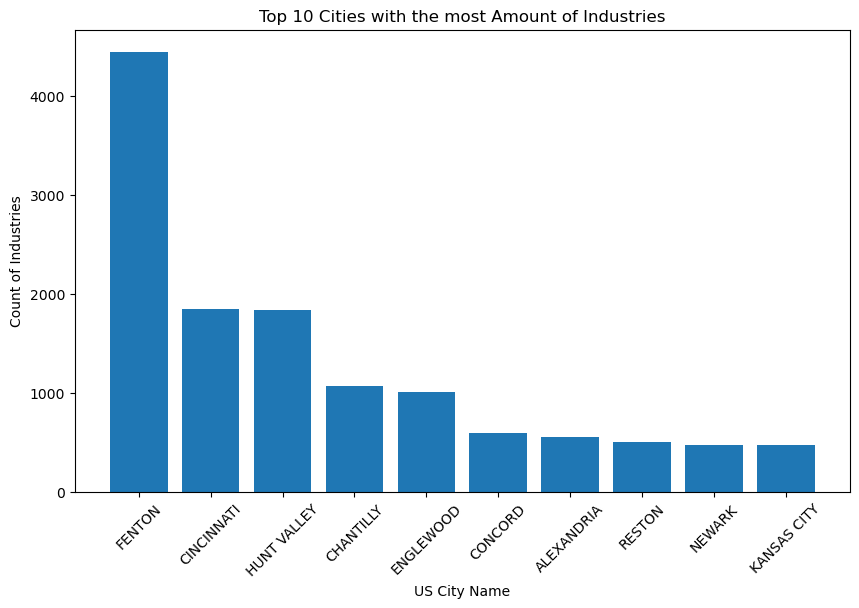

In [41]:
remediation = awarded_companies[awarded_companies['naics_description'] == '']
city_counts = remediation.groupby('recipient_city_name').size()

plt.figure(figsize=(10, 6))
sorted_cities = city_counts.sort_values(ascending=False).head(10)
plt.bar(sorted_cities.index, sorted_cities.values)
plt.xticks(range(len(sorted_cities)), rotation=45)
plt.xlabel(xlabel="US City Name")
plt.ylabel(ylabel="Count of Industries")
plt.title("Top 10 Cities with the most Amount of Industries")
plt.show()

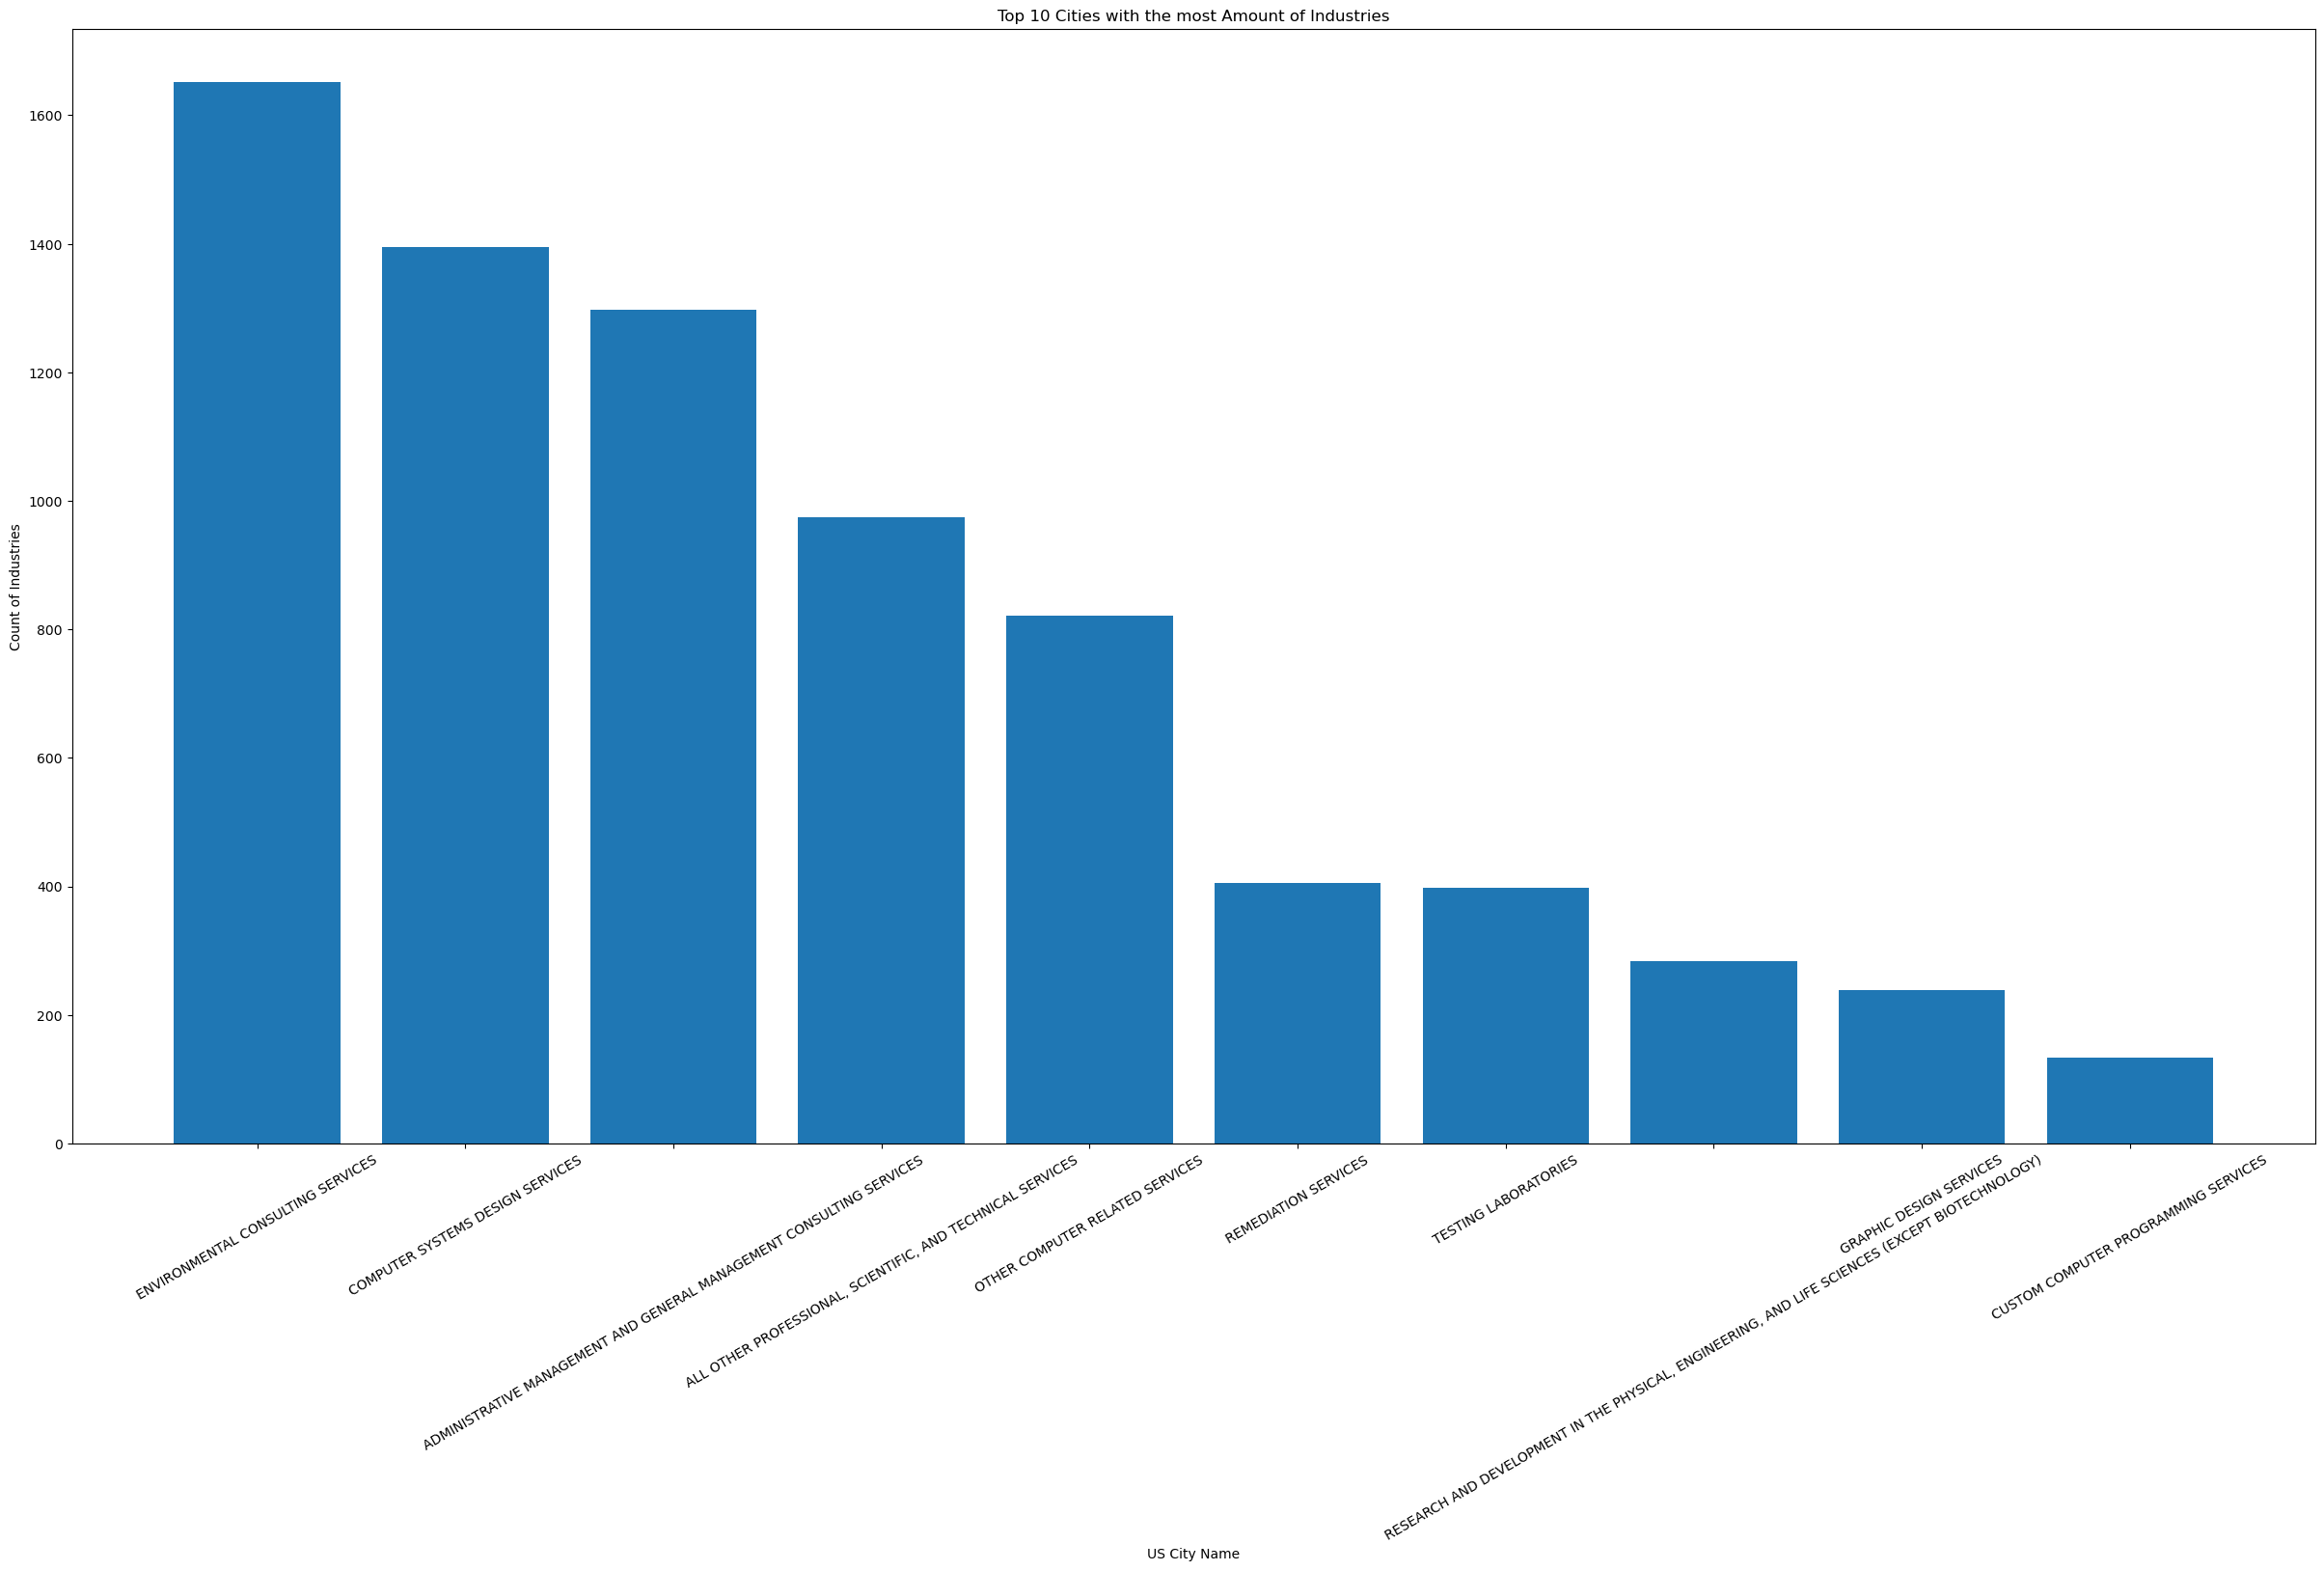

In [67]:
lexington = awarded_companies[awarded_companies['recipient_city_name'] == 'FAIRFAX']
industries = lexington.groupby('naics_description').size()

plt.figure(figsize=(30, 15))
sorted_cities = industries.sort_values(ascending=False).head(10)
plt.bar(sorted_cities.index, sorted_cities.values)
plt.xticks(range(len(sorted_cities)), rotation=30)
plt.xlabel(xlabel="US City Name")
plt.ylabel(ylabel="Count of Industries")
plt.title("Top 10 Cities with the most Amount of Industries")
plt.show()

In [80]:
lexington = awarded_companies[awarded_companies['recipient_city_name'] == 'LEXINGTON']
exact_value_awards = lexington[lexington['potential_total_value_of_award'] == 64453975010.45]
count = exact_value_awards.shape[0]
print(count)

3


In [81]:
awarded_companies[awarded_companies['potential_total_value_of_award'] == 64453975010.45]

,contract_transaction_unique_key,contract_award_unique_key,award_id_piid,modification_number,transaction_number,parent_award_agency_id,parent_award_agency_name,parent_award_id_piid,parent_award_modification_number,federal_action_obligation,...,highly_compensated_officer_2_amount,highly_compensated_officer_3_name,highly_compensated_officer_3_amount,highly_compensated_officer_4_name,highly_compensated_officer_4_amount,highly_compensated_officer_5_name,highly_compensated_officer_5_amount,usaspending_permalink,initial_report_date,last_modified_date
49870,6800_-NONE-_EPW12006_P00081_-NONE-_0,CONT_AWD_EPW12006_6800_-NONE-_-NONE-,EPW12006,P00081,0.0,NaN,NaN,NaN,NaN,0.0,...,281916.0,LINDA DIAMOND,299441.0,AYLIN SERTKAYA,263610.0,PAUL BUELLESBACH,296029.0,https://www.usaspending.gov/award/CONT_AWD_EPW...,2020-04-22,2020-04-22
50942,6800_-NONE-_EPW12006_P00080_-NONE-_0,CONT_AWD_EPW12006_6800_-NONE-_-NONE-,EPW12006,P00080,0.0,NaN,NaN,NaN,NaN,245000.0,...,281916.0,LINDA DIAMOND,299441.0,AYLIN SERTKAYA,263610.0,PAUL BUELLESBACH,296029.0,https://www.usaspending.gov/award/CONT_AWD_EPW...,2020-03-26,2020-03-26
51098,6800_-NONE-_EPW12006_P00079_-NONE-_0,CONT_AWD_EPW12006_6800_-NONE-_-NONE-,EPW12006,P00079,0.0,NaN,NaN,NaN,NaN,652400.0,...,281916.0,LINDA DIAMOND,299441.0,AYLIN SERTKAYA,263610.0,PAUL BUELLESBACH,296029.0,https://www.usaspending.gov/award/CONT_AWD_EPW...,2020-03-05,2020-03-23


In [39]:
cols = awarded_companies.select_dtypes("object").columns

for col in cols:
    awarded_companies[f'{col}'] = awarded_companies[f'{col}'].astype('category')
    awarded_companies[f'{col}-coded'] = awarded_companies[f'{col}'].cat.codes
    awarded_companies.drop(f'{col}', axis=1, inplace=True)

awarded_companies.info()

C:\Users\sambi\AppData\Local\Temp\ipykernel_39896\2387300825.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  awarded_companies[f'{col}-coded'] = awarded_companies[f'{col}'].cat.codes
C:\Users\sambi\AppData\Local\Temp\ipykernel_39896\2387300825.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  awarded_companies[f'{col}-coded'] = awarded_companies[f'{col}'].cat.codes
C:\Users\sambi\AppData\Local\Temp\ipykernel_39896\2387300825.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98689 entries, 0 to 98688
Columns: 293 entries, transaction_number to last_modified_date-coded
dtypes: float64(30), int16(49), int32(2), int64(3), int8(209)
memory usage: 54.5 MB


In [42]:
y = awarded_companies['potential_total_value_of_award']
X = awarded_companies.drop(columns=['potential_total_value_of_award', 'base_and_all_options_value'], axis=1)

selector = VarianceThreshold(threshold=30)
selector.fit_transform(X)
selector.variances_
selector.n_features_in_
selector.feature_names_in_

array(['transaction_number', 'federal_action_obligation',
       'total_dollars_obligated',
       'total_outlayed_amount_for_overall_award',
       'base_and_exercised_options_value', 'current_total_value_of_award',
       'outlayed_amount_from_COVID-19_supplementals_for_overall_award',
       'obligated_amount_from_COVID-19_supplementals_for_overall_award',
       'outlayed_amount_from_IIJA_supplemental_for_overall_award',
       'obligated_amount_from_IIJA_supplemental_for_overall_award',
       'action_date_fiscal_year', 'awarding_agency_code',
       'awarding_sub_agency_code', 'funding_agency_code',
       'funding_sub_agency_code', 'sam_exception', 'recipient_duns',
       'recipient_parent_duns',
       'prime_award_transaction_recipient_county_fips_code',
       'prime_award_transaction_recipient_state_fips_code',
       'prime_award_transaction_place_of_performance_county_fips_code',
       'prime_award_transaction_place_of_performance_state_fips_code',
       'number_of_acti

In [43]:
X_var = X[selector.feature_names_in_]
X_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98689 entries, 0 to 98688
Columns: 291 entries, transaction_number to last_modified_date-coded
dtypes: float64(28), int16(49), int32(2), int64(3), int8(209)
memory usage: 53.0 MB


In [88]:
X_var.dropna(axis=1, how='any', inplace=True)

In [89]:
X_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86402 entries, 0 to 86401
Columns: 265 entries, federal_action_obligation to last_modified_date-coded
dtypes: float64(1), int16(49), int32(2), int64(5), int8(208)
memory usage: 29.8 MB


In [90]:
corr_matrix = X_var.corr().abs()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_data = corr_matrix.mask(mask)
cols_to_drop = [c for c in tri_data.columns if any(tri_data[c] > 0.75)]

X_corr_var = X_var.drop(cols_to_drop, axis=1)
X_corr_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86402 entries, 0 to 86401
Columns: 193 entries, federal_action_obligation to last_modified_date-coded
dtypes: float64(1), int16(35), int32(2), int64(4), int8(151)
memory usage: 22.2 MB


In [91]:
X_train, X_test, y_train, y_test = train_test_split(X_corr_var, y, test_size=0.3, random_state=90)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso = LassoCV()
lasso.fit(X_train_scaled, y_train)
print(lasso.score(X_train_scaled, y_train))
print(lasso.score(X_test_scaled, y_test))
lasso_mask = lasso.coef_ != 0

0.017859848238389597
0.016472140194719764


In [92]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60481 entries, 37677 to 36699
Columns: 193 entries, federal_action_obligation to last_modified_date-coded
dtypes: float64(1), int16(35), int32(2), int64(4), int8(151)
memory usage: 16.0 MB


In [93]:
# svm = LinearSVC(penalty='l1', dual=False, max_iter=10)
# svm.fit(X_train_scaled, y_train)
# print("SVM score:", svm.score(X_test_scaled, y_test))
# svm_mask = svm.coef_[0] != 0

In [94]:
rf = RandomForestRegressor(n_estimators=30, min_samples_leaf=0.03, n_jobs=-1)
rf.fit(X_train_scaled, y_train)
print(rf.feature_importances_)
rf_mask = rf.feature_importances_ > 0.03

[6.09917747e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 6.88792288e-05 9.14319825e-03 1.81580778e-06
 0.00000000e+00 5.31773250e-08 3.77204784e-06 9.79864057e-05
 9.32811270e-06 0.00000000e+00 0.00000000e+00 0.00000000e+00
 6.37828423e-09 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.79764864e-09
 1.66507027e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 6.79515461e-08
 1.39662720e-07 5.39103760e-08 0.00000000e+00 2.92534933e-07
 2.51718936e-08 9.70595306e-06 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

In [95]:
rfe = RFE(estimator=RandomForestRegressor(n_estimators=30, min_samples_leaf=0.03, n_jobs=-1), n_features_to_select=20, step=7, verbose=2)
rfe.fit(X_train_scaled, y_train)
accuracy = rfe.score(X_test_scaled, y_test)
print("RFE Accuracy:", accuracy)
rfe_mask = rfe.support_

Fitting estimator with 193 features.
Fitting estimator with 186 features.
Fitting estimator with 179 features.
Fitting estimator with 172 features.
Fitting estimator with 165 features.
Fitting estimator with 158 features.
Fitting estimator with 151 features.
Fitting estimator with 144 features.
Fitting estimator with 137 features.
Fitting estimator with 130 features.
Fitting estimator with 123 features.
Fitting estimator with 116 features.
Fitting estimator with 109 features.
Fitting estimator with 102 features.
Fitting estimator with 95 features.
Fitting estimator with 88 features.
Fitting estimator with 81 features.
Fitting estimator with 74 features.
Fitting estimator with 67 features.
Fitting estimator with 60 features.
Fitting estimator with 53 features.
Fitting estimator with 46 features.
Fitting estimator with 39 features.
Fitting estimator with 32 features.
Fitting estimator with 25 features.
RFE Accuracy: 0.006340668296362262


In [96]:
vote_sum = np.sum([lasso_mask, rf_mask, rfe_mask], axis=0)
meta_mask = vote_sum >= 2
X_reduced_corr_var = X_corr_var.loc[:, meta_mask]
X_corr_var.info()
X_reduced_corr_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86402 entries, 0 to 86401
Columns: 193 entries, federal_action_obligation to last_modified_date-coded
dtypes: float64(1), int16(35), int32(2), int64(4), int8(151)
memory usage: 22.2 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86402 entries, 0 to 86401
Data columns (total 19 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   federal_action_obligation                              86402 non-null  float64
 1   contract_transaction_unique_key-coded                  86402 non-null  int32  
 2   modification_number-coded                              86402 non-null  int16  
 3   parent_award_id_piid-coded                             86402 non-null  int16  
 4   parent_award_modification_number-coded                 86402 non-null  int16  
 5   disaster_emergency_fund_codes_for_overall_award-coded  86402 no

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced_corr_var, y, test_size=0.3, random_state=90)

scaler_st = StandardScaler()
X_train_scaled = scaler_st.fit_transform(X_train)
X_test_scaled = scaler_st.transform(X_test)

param_grid = {
    'alpha': [0.05, 0.07, 0.09, 0.1, 0.25, 0.5, 0.75, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'max_iter': range(1000, 10000),
    'solver':['auto', 'svd', 'cholesky', 'sparse_cg', 'lsqr', 'sag', 'saga']
}

ridge_model = Ridge()
rs_cost = RandomizedSearchCV(estimator=ridge_model, param_distributions=param_grid, n_iter=30, 
                             cv=10, n_jobs=-1, verbose=3, scoring="r2", random_state=90)
rs_cost.fit(X_train_scaled, y_train)

print("Best Train Score:", rs_cost.score(X_train_scaled, y_train))
print("Best Test Score :", rs_cost.score(X_test_scaled, y_test))
print("Best Parameters:", rs_cost.best_params_)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
Best Train Score: 0.004126330978931558
Best Test Score : 0.003907928921186854
Best Parameters: {'solver': 'sag', 'max_iter': 2314, 'alpha': 9}


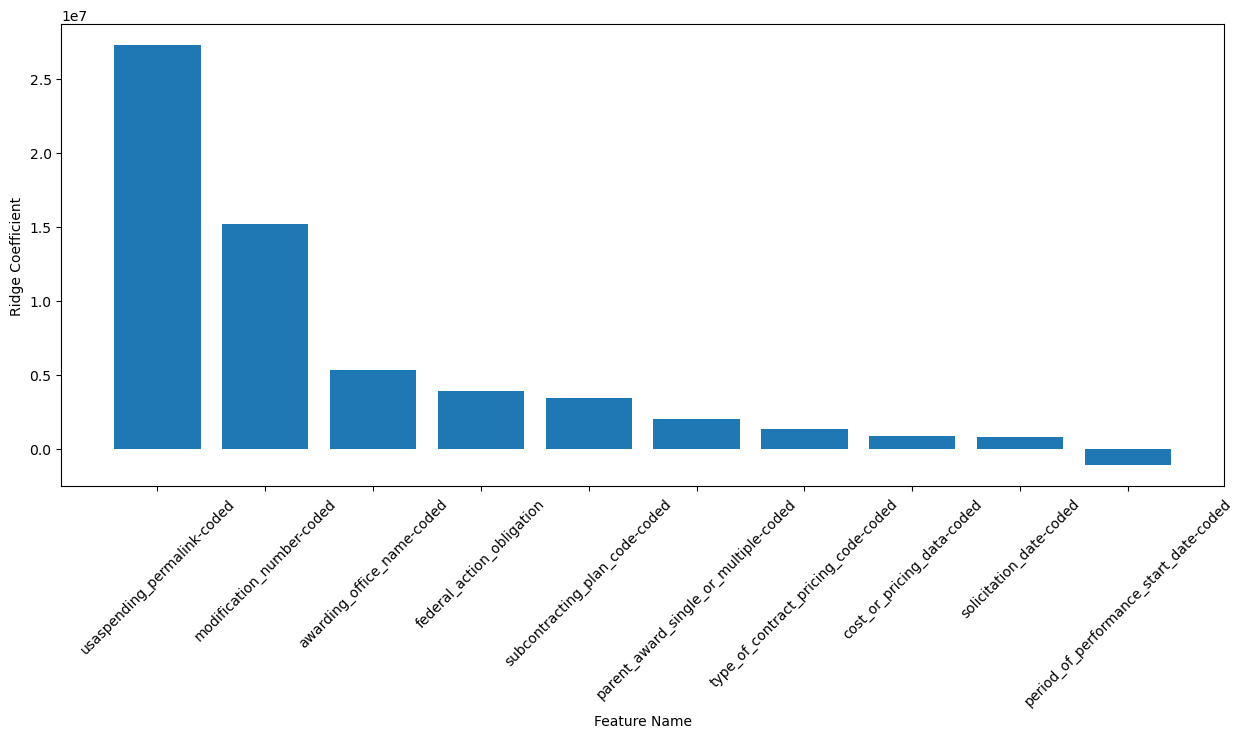

In [98]:
ridge_cost = rs_cost.best_estimator_
ridge_cost.fit(X_train_scaled, y_train)
top_n = 10

features = ridge_cost.coef_
sorted_indices = np.argsort(features)[::-1]
plt.figure(figsize=(15, 6))
plt.bar(range(top_n), features[sorted_indices][:top_n])
plt.xticks(range(top_n), X_reduced_corr_var.columns[sorted_indices][:top_n], rotation=45)
plt.xlabel(xlabel="Feature Name")
plt.ylabel(ylabel="Ridge Coefficient")
plt.show()